# Decision Tree Example

This notebook uses a sampling of data taken from the Buzzfeed news Github repository on the analysis of surveillance planes found [here](https://github.com/BuzzFeedNews/2016-04-federal-surveillance-planes) and arbitrarily assigned classes.

In [ ]:
# After running this cell to install graphviz, restart the python kernel
!sudo add-apt-repository universe 
!sudo apt update
!sudo apt install -y graphviz
!pip3 install --user graphviz

In [1]:
#get the packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython import display
from sklearn.externals.six import StringIO  
import graphviz 

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
#read in data
data = pd.read_csv('/mnt/data/demo-notebooks-data/simple_example_classes.csv')

In [3]:
#look at a few rows of data
data.sample(5)

,speed,altitude,class
0,0,3600,other
42,78,9450,other
23,69,5500,other
24,69,6450,other
77,98,9474,surveillance


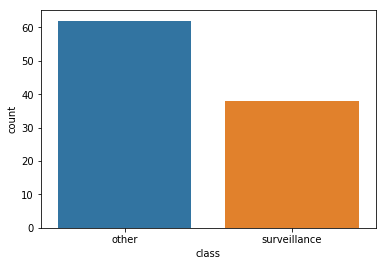

In [4]:
#look at breakdown of classes
sns.countplot(x='class', data=data);

In [5]:
#create the X and y data from our dataset
X = data[['speed', 'altitude']]
y = data['class']

In [6]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

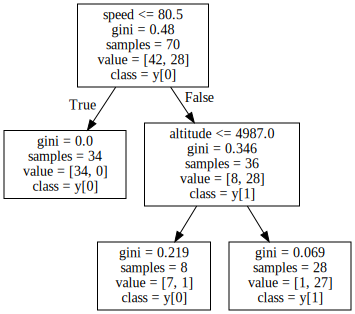

In [7]:
#create and fit decision tree model
decision_tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

# Generate a plot of the decision tree
columns=list(X_train.columns)
graphviz.Source(tree.export_graphviz(decision_tree_model, out_file=None, feature_names=columns,class_names=True))

In [8]:
#make predictions on the test data
predictions = decision_tree_model.predict(X_test)

In [9]:
#create a data frame that compares the real values to the predicted values
test_data = pd.concat([X_test, y_test], axis=1)
test_data['predicted_class'] = predictions
test_data.reset_index(drop=True, inplace=True)
test_data.head()

,speed,altitude,class,predicted_class
0,109,8200,surveillance,surveillance
1,82,5449,surveillance,surveillance
2,94,6600,other,surveillance
3,80,7125,other,other
4,80,6325,other,other


In [10]:
test_data[(test_data['speed'] <= 80.5) & (test_data['altitude'] <= 4987)]

,speed,altitude,class,predicted_class
5,75,4950,other,other
8,60,4375,other,other
9,0,3600,other,other
11,70,4300,other,other
13,71,4400,other,other
15,47,4700,other,other
18,60,4290,other,other
25,62,4550,other,other


In [11]:
test_data[(test_data['speed'] > 80.5) & (test_data['altitude'] > 4987)]

,speed,altitude,class,predicted_class
0,109,8200,surveillance,surveillance
1,82,5449,surveillance,surveillance
2,94,6600,other,surveillance
7,105,8900,surveillance,surveillance
12,94,7400,surveillance,surveillance
16,98,8425,surveillance,surveillance
17,98,9474,surveillance,surveillance
20,83,6325,surveillance,surveillance
24,93,7625,surveillance,surveillance
27,137,8350,surveillance,surveillance


In [12]:
#print accuracy score for the test set
decision_tree_model.score(X_test, y_test)

0.9666666666666667